# 딥러닝 (1)
## 퍼셉트론  -  퍼셉트론이 은닉층이 하나라도 껴있으면 딥러닝
퍼셉트론은 인공 신경망(Artificial Neural Network)의 가장 기본적인 구성 요소 중 하나로, 사람의 뇌에 있는 뉴런(신경 세포)의 작동 방식을 모방하여 만들어졌습니다. 간단히 말해, 여러 개의 입력을 받아 각각에 중요도(가중치)를 곱한 후, 모두 더한 값이 특정 기준치(임계값)를 넘으면 '활성화'(보통 1)되고, 넘지 못하면 '비활성화'(보통 0)되는 매우 단순한 분류기(Classifier)입니다.

In [1]:
import numpy as np

### AND 게이트
AND 게이트는 두 개의 입력이 모두 참(1)일 때만 결과가 참(1)이 되고, 그 외의 경우에는 모두 거짓(0)이 되는 논리 회로입니다.

In [2]:
x = np.array([0.5, 0.3])
w = np.array([0.2, -0.5])
b = 0.3       # 편향

In [5]:
sum(x * w) + b    # y^값

0.25

In [12]:
# AND게이트 함수
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    value = sum(x*w) + b       # 이 value값이 어떤 임계를 넘으면 1을 return하게
    if value > 0:
        return 1
    else:
        return 0

In [13]:
# AND: 둘다 1일때만 1이어야함  <-  이조건만족하도록 위의 가중치 수정
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


### OR 게이트
OR 게이트는 두 개의 입력 중 하나라도 참(1)이면 결과가 참(1)이 되고, 두 입력이 모두 거짓(0)일 때만 결과가 거짓(0)이 되는 논리 게이트입니다.

In [40]:
# OR게이트 함수
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.3
    value = sum(x*w) + b       # 이 value값이 어떤 임계를 넘으면 1을 return하게
    if value > 0:
        return 1
    else:
        return 0

In [41]:
# OR: 단하나라도 1이면 1  <-  이조건만족하도록 위의 가중치 수정
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


### NAND 게이트
NAND 게이트는 두 개의 입력이 모두 참(1)일 때만 결과가 거짓(0)이 되고, 그 외의 경우에는 모두 참(1)이 되는 논리 게이트입니다.

In [42]:
# NAND게이트 함수 - AND의 반대
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    value = sum(x*w) + b       # 이 value값이 어떤 임계를 넘으면 1을 return하게
    if value > 0:
        return 0
    else:
        return 1

In [43]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


# 비선형 게이트 

### XOR 게이트
XOR 게이트는 "Exclusive OR(배타적 논리합)"의 줄임말로, 두 개의 입력이 서로 다를 때만 결과가 참(1)이 되고, 두 입력이 서로 같으면 결과가 거짓(0)이 되는 논리 게이트입니다. XOR 게이트에 대해 설명해 드릴게요. XOR 게이트는 퍼셉트론의 역사에서 매우 중요한 의미를 가집니다. 바로 단일 퍼셉트론(Single Perceptron)으로는 해결할 수 없는 문제의 대표적인 예시이기 때문입니다.

In [72]:
# XOR게이트 함수  <-  선형모델로는 불가능.
# 딥러닝 : 선형모델으로 비선형모델을 표현
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [71]:
# XOR: 두 입력이 같을때는 0, 다르면 1 
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


### 계단 함수
계단 함수는 이름 그대로 그래프 모양이 계단처럼 생긴 아주 간단한 함수입니다. 하는 역할은 더 간단해요. 입력값이 특정 기준점(임계값, threshold)보다 크거나 같으면 하나의 값(보통 1)을 출력하고, 기준점보다 작으면 다른 값(보통 0)을 출력합니다.

In [73]:
def step_func(x):
    y = x > 0
    return y.astype(int)

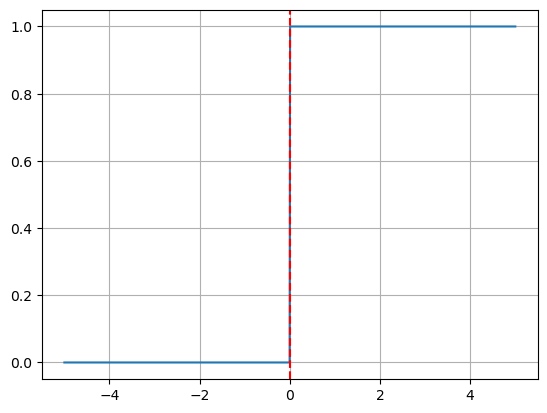

In [81]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
y = step_func(x)

plt.plot(x,y)
plt.axvline(0, color = "red", linestyle = "--")
plt.grid()
plt.show()

# 비선형으로 표현하긴하지만, 정확하게 데이터를 표현해주진 못한다

### 시그모이드 함수
시그모이드 함수는 로지스틱 함수(Logistic Function)라고도 불리며, 그 모양이 마치 알파벳 'S'자와 비슷하게 생긴 함수입니다. 이 함수의 가장 큰 특징은 어떤 입력값이 들어오든 출력값을 항상 0과 1 사이의 값으로 변환해준다는 것입니다.

In [82]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

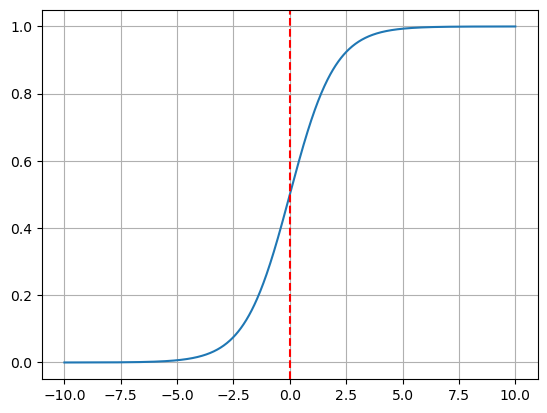

In [84]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)

plt.plot(x,y)
plt.axvline(0, color = "red", linestyle = "--")
plt.grid()
plt.show()

In [ ]:
# 입력층 / 은닉층(여러게) / 출력층  =>  은닉층 여러개면  출력층에서의 오차값 미분해서 바로 앞 은닉층으로, 또 미분해서 그 앞 은닉층으로, ...
# 딥러닝으로 은닉층 여러개만들면 오히려 학습이 안됨 
# => 시그모이드 쓰면 값의 70%가 날라감  =>  기울기 소실 문제

### 렐루 함수
ReLU 함수는 정말 매우 매우 간단합니다. 작동 방식은 다음과 같습니다.
* 입력값(x)이 0보다 크면, 입력값을 그대로 출력합니다.
* 입력값(x)이 0 이하이면 (0 또는 음수), 0을 출력합니다.

In [85]:
def relu(x):
    return np.maximum(0, x)

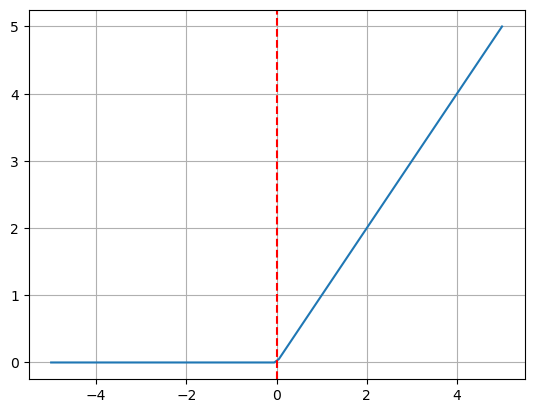

In [86]:
x = np.linspace(-5, 5, 100)
y = relu(x)

plt.plot(x,y)
plt.axvline(0, color = "red", linestyle = "--")
plt.grid()
plt.show()

## 연습문제
1. 입력 x1 = 1, x2 = 0 이 주어졌을 때, 다음 각 논리 게이트의 출력 y 값은 무엇일까요?
* AND 게이트: y = ?
* OR 게이트: y = ?
* NAND 게이트: y = ?
* XOR 게이트: y = ?

In [87]:
print(AND(1, 0))   # 둘다 1일때만 1.
print(OR(1, 0))
print(NAND(1, 0))
print(XOR(1, 0))   # 두개 다르니까 1

0
1
1
1


2. AND, OR, NAND, XOR 게이트 중에서, 단일 퍼셉트론으로 구현할 수 없는 게이트는 무엇인가요? 그 이유는 무엇인가요?AND, OR, NAND, XOR 게이트 중에서, 단일 퍼셉트론으로 구현할 수 없는 게이트는 무엇인가요? 그 이유는 무엇인가요?

=> XOR 게이트. 선형으로는 구현할 수 없기 때문

3. 입력값 x = -2 일 때, 다음 각 활성화 함수의 출력값을 (계산기를 사용하거나 손으로) 계산해 보세요. (시그모이드 계산 시 e≈2.718 로 가정)
* 계단 함수 (임계값 0): step(-2) = ?
* 시그모이드 함수: sigmoid(-2) = 1 / (1 + e^(-(-2))) = ?
* ReLU 함수: ReLU(-2) = ?

=> step(-2) = 0   
sigmoid(-2) = 0.119   
ReLU(-2) = 0   

4. 다음 NumPy 배열 inputs 에 대해 계단 함수, 시그모이드 함수, ReLU 함수를 각각 적용한 결과 배열을 NumPy 코드로 작성하고 출력하세요.

In [90]:
inputs = np.array([-3.0, -0.5, 0.0, 1.5, 4.0])


# 여기에 각 활성화 함수를 적용하는 코드를 작성하세요
step_output = step_func(inputs)
sigmoid_output = sigmoid(inputs)
relu_output = relu(inputs)

print(step_output)
print(sigmoid_output)
print(relu_output)

[0 0 0 1 1]
[0.04742587 0.37754067 0.5        0.81757448 0.98201379]
[0.  0.  0.  1.5 4. ]


5. 다음과 같이 3차원 NumPy 배열 arr3d 가 생성되었다고 가정합니다. 이 배열의 shape, ndim (차원 수), size (전체 요소 개수)를 확인하는 코드를 작성하고 결과를 예측해보세요.

In [113]:
arr3d = np.array([[[10, 11], [12, 13]],
                  [[20, 21], [22, 23]]])

shape = arr3d.shape     # 2행 2열짜리가 2개 => 3차원
ndim = arr3d.ndim
size = arr3d.size

shape, ndim, size

((2, 2, 2), 3, 8)

6. 다음 행렬 A와 B의 shape가 주어졌을 때, 행렬 곱 A @ B 가 가능한지 판단하고, 가능하다면 결과 행렬의 shape는 무엇일지 예측하세요.
* A.shape = (3, 4), B.shape = (4, 5) -> A @ B 가능? 결과 shape?
* A.shape = (2, 3), B.shape = (2, 4) -> A @ B 가능? 결과 shape?
* A.shape = (5, 1), B.shape = (1, 7) -> A @ B 가능? 결과 shape?
* A.shape = (4, 2), B.shape = (3, 4) -> A @ B 가능? 결과 shape?

=> 1, 3번째 가능 : (3, 5), (5, 7)   
2, 4번째 불가능

7. 다음 두 행렬 matrix_a 와 matrix_b 의 행렬 곱(matrix_a @ matrix_b) 결과를 NumPy 코드로 계산하고 출력하세요.

In [114]:
matrix_a = np.array([[1, -1],
                     [0,  2]])

matrix_b = np.array([[3, 0, 1],
                     [-1, 2, 0]])

# 행렬 곱 결과를 계산하고 출력하는 코드를 작성하세요
print(matrix_a @ matrix_b)
print(matrix_a.shape, matrix_b.shape)

[[ 4 -2  1]
 [-2  4  0]]
(2, 2) (2, 3)


8. 문제 7의 matrix_a 와 다음과 같은 matrix_c 에 대해, 행렬 곱 (@) 과 요소별 곱 (*) 을 각각 계산하고 그 결과가 어떻게 다른지 설명하세요.

In [98]:
matrix_a = np.array([[1, -1],
                     [0,  2]])

matrix_c = np.array([[5, 1],
                     [3, -2]])

print(matrix_a @ matrix_c)
print(matrix_a * matrix_c)

[[ 2  3]
 [ 6 -4]]
[[ 5 -1]
 [ 0 -4]]


9. 입력 x = [0.5, -1.0], 가중치 w = [0.8, 0.3], 편향 b = -0.1 인 퍼셉트론이 있다고 가정합니다.
* 가중합 z = (x[0]*w[0] + x[1]*w[1]) + b 를 계산하세요.
* 계산된 가중합 z 에 계단 함수(임계값 0)를 적용한 최종 출력값 y 를 구하세요.

(NumPy를 사용해도 좋고, 직접 계산해도 좋습니다.)

In [118]:
x = np.array([0.5, -1.0])
w = np.array([0.8, 0.3])
b = -0.1

# z = (x[0]*w[0] + x[1]*w[1]) + b
z = sum(x * w) + b
y = step_func(z)
y

1

10. 문제 9에서 계산된 가중합 z 값을 다음 활성화 함수에 각각 적용했을 때의 출력값을 계산하세요. (NumPy 함수 사용 권장)
* 시그모이드 함수: sigmoid(z) = ?
* ReLU 함수: ReLU(z) = ?

In [119]:
sigmoid(z), relu(z)

(0.5, 2.7755575615628914e-17)